### Case 1 - Offshore windfarm - AC Substation - DC Collection cable
This notebook shows the basics of Case 1 as suggested by Wouter van den Haak:



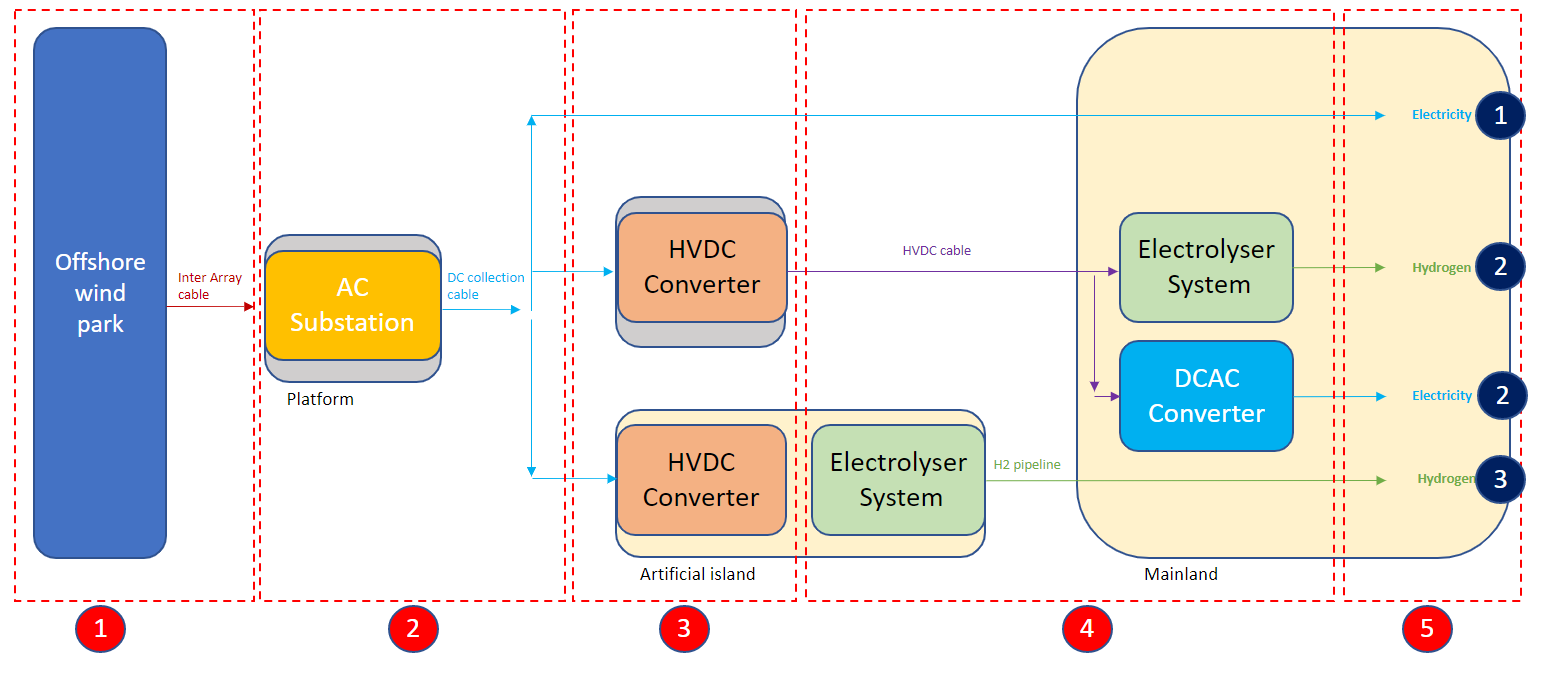

#### 0. Import basic methods (a.o. from source2.py)

In [25]:
from source2 import *
import folium
import numpy as np
import matplotlib.pyplot as plt

import pyproj
import shapely.geometry
from shapely.geometry.base import BaseGeometry

In [26]:
# load basic info from the Input sheet
mapping = load_input_from_xls(filename=r'Case 1 - Input Sheet.xlsm')
Inputs = extract_scenario(mapping, 'Scenario1')

##### 1. prepare input data and generate objects

In [27]:
foundation_data = get_object_data(Inputs=Inputs, 
                               subsystem='Wind energy source & Transport', 
                               element='Offshore wind park',
                               component='Foundation & cable')
foundation_data['depreciation_rate']=1/foundation_data['economic_lifetime']
display(foundation_data)

turbine_data = get_object_data(Inputs=Inputs, 
                               subsystem='Wind energy source & Transport', 
                               element='Offshore wind park',
                               component='Turbine')
turbine_data['depreciation_rate']=1/turbine_data['economic_lifetime']
display(turbine_data)

AC_substation_data = get_object_data(Inputs=Inputs, 
                               subsystem='AC Substation & Transport', 
                               element='AC Substation & Transport',
                               component='AC Substation')
AC_substation_data['depreciation_rate']=1/AC_substation_data['economic_lifetime']
display(AC_substation_data)

DC_collection_cable_data = get_object_data(Inputs=Inputs, 
                               subsystem='AC Substation & Transport', 
                               element='AC Substation & Transport',
                               component='DC collection cable')
DC_collection_cable_data['depreciation_rate']=1/DC_collection_cable_data['economic_lifetime']
display(DC_collection_cable_data)

DCAC_converter_data = get_object_data(Inputs=Inputs, 
                               subsystem='Electrolysis, Electricity & Transport', 
                               element='Electricity',
                               component='DCAC Converter')
DCAC_converter_data['depreciation_rate']=1/DCAC_converter_data['economic_lifetime']
display(DCAC_converter_data)

Mainland_data = get_object_data(Inputs=Inputs, 
                               subsystem='Electrolysis, Electricity & Transport', 
                               element='Facility location',
                               component='Mainland')
Mainland_data['depreciation_rate']=1/Mainland_data['economic_lifetime']
display(Mainland_data)

{'sub_system': 'Wind energy source & Transport',
 'element': 'Offshore wind park',
 'component': 'Foundation & cable',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 971621.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 3000.0,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 30,
 'depreciation_flag': 1,
 'depreciation_rate': 0.03333333333333333,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.015,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.35,
 'residual_value': 0.01}

{'sub_system': 'Wind energy source & Transport',
 'element': 'Offshore wind park',
 'component': 'Turbine',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 1139979.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 3000.0,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 30,
 'depreciation_flag': 1,
 'depreciation_rate': 0.03333333333333333,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.03,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.08,
 'residual_value': 0.01}

{'sub_system': 'AC Substation & Transport',
 'element': 'AC Substation & Transport',
 'component': 'AC Substation',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 185000.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 3000.0,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 40,
 'depreciation_flag': 1,
 'depreciation_rate': 0.025,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.03,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.2,
 'residual_value': 0.01}

{'sub_system': 'AC Substation & Transport',
 'element': 'AC Substation & Transport',
 'component': 'DC collection cable',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 2000.0,
 'capex_per_unit_units': 'EUR / m',
 'unit': 3000.0,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 40,
 'depreciation_flag': 1,
 'depreciation_rate': 0.025,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.03,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.2,
 'residual_value': 0.01}

{'sub_system': 'Electrolysis, Electricity & Transport',
 'element': 'Electricity',
 'component': 'DCAC Converter',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 285000.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 3000.0,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 25,
 'depreciation_flag': 1,
 'depreciation_rate': 0.04,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.03,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.25,
 'residual_value': 0.01}

issue detected


{'sub_system': 'Electrolysis, Electricity & Transport',
 'element': 'Facility location',
 'component': 'Mainland',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 6000.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 3000.0,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 80,
 'depreciation_flag': 1,
 'depreciation_rate': 0.0125,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.1,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.01,
 'residual_value': []}

In [28]:
Turbine = Object(**turbine_data)
Foundation = Object(**foundation_data)
ACStation = Object(**AC_substation_data)
DCCollectionCable = Object(**DC_collection_cable_data)
DCACConverter = Object(**DCAC_converter_data)
Mainland = Object(**Mainland_data)

##### 2. generate cashflows

In [29]:
lifecycle = 29

Foundation.generate_cashflows(startyear=2023, lifecycle=lifecycle, debug=False)
Turbine.generate_cashflows(startyear=2023, lifecycle=lifecycle, debug=False)
ACStation.generate_cashflows(startyear=2023, lifecycle=lifecycle, debug=False)
DCCollectionCable.generate_cashflows(startyear=2023, lifecycle=lifecycle, debug=False)
DCACConverter.generate_cashflows(startyear=2023, lifecycle=lifecycle, debug=False)
Mainland.generate_cashflows(startyear=2023, lifecycle=lifecycle, debug=False)


In [30]:
# place escalated revenue values in the cashflow dataframe
df_combined=combine_cashflow_dataframes([Foundation.df, Turbine.df, ACStation.df, DCCollectionCable.df, DCACConverter.df, Mainland.df])

In [31]:
# Print Foundation values (without revenues)
display(Foundation.df)

,years,capex,opex,revenue
years,,,,
2023,2023,-5.946321e+08,0.000000e+00,0
2024,2024,-1.213049e+09,0.000000e+00,0
2025,2025,-1.237310e+09,0.000000e+00,0
2026,2026,0.000000e+00,-6.591994e+07,0
2027,2027,0.000000e+00,-6.723834e+07,0
2028,2028,0.000000e+00,-6.858311e+07,0
2029,2029,0.000000e+00,-6.995477e+07,0
2030,2030,0.000000e+00,-7.135386e+07,0
2031,2031,0.000000e+00,-7.278094e+07,0


##### 4. calculate NPVs

In [32]:
df_combined_npv=calculate_npv(df_combined, 2023, WACC=0.0984)

##### 5. plot

###### 5.1 NPV plot

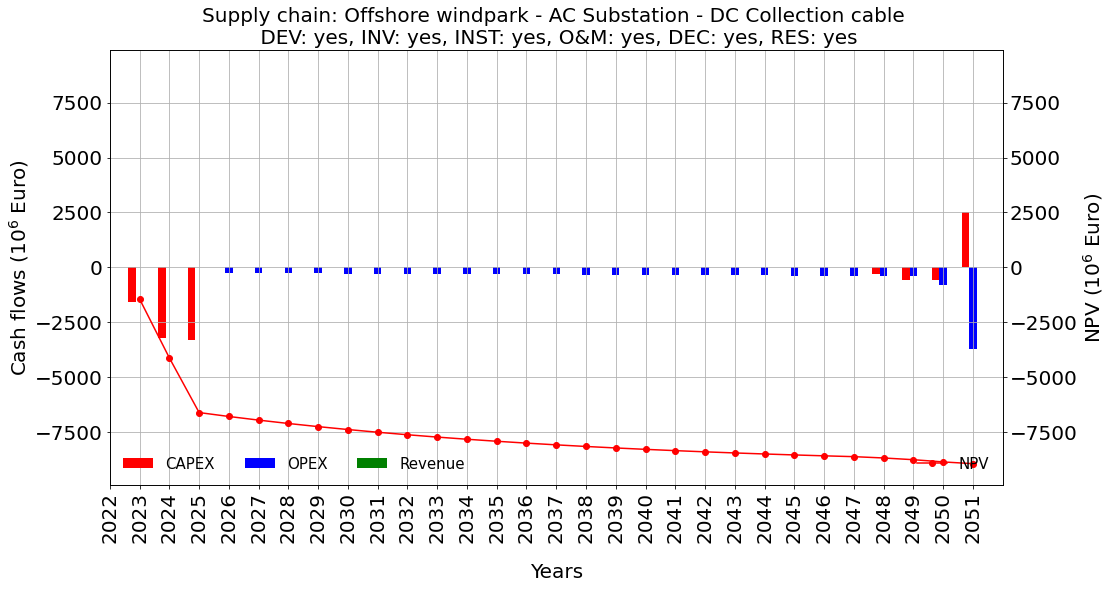

In [33]:
# DEV: Project development costs
# INV: Investment / procurement costs
# INST: Installation / construction costs 
# O&M: Yearly variable / O&M costs 
# DEC: Decommissioning costs 
# RES: Residual value   

create_npv_plot(df_combined_npv, title='Supply chain: Offshore windpark - AC Substation - DC Collection cable \n DEV: yes, INV: yes, INST: yes, O&M: yes, DEC: yes, RES: yes' )

###### 5.2 PIE plot

In [34]:
# collect the npv calculations per item (without revenues)
Turbine.df_npv = calculate_npv(Turbine.df, 2023, WACC=0.0984)
Foundation.df_npv = calculate_npv(Foundation.df, 2023, WACC=0.0984)
ACStation.df_npv = calculate_npv(ACStation.df, 2023, WACC=0.0984)
DCCollectionCable.df_npv = calculate_npv(DCCollectionCable.df, 2023, WACC=0.0984)
DCACConverter.df_npv = calculate_npv(DCACConverter.df, 2023, WACC=0.0984)
Mainland.df_npv = calculate_npv(Mainland.df, 2023, WACC=0.0984)

In [35]:
# prepare input for pie plot
labels = ['Foundations & cables', 'Turbines', 'AC Station', 'AC collection cable', 'DCAC Converter', 'Mainland']
data = [
    -Foundation.df_npv.cashflow_sum.iloc[-1],
    -Turbine.df_npv.cashflow_sum.iloc[-1],
    -ACStation.df_npv.cashflow_sum.iloc[-1],
    -DCCollectionCable.df_npv.cashflow_sum.iloc[-1],
    -DCACConverter.df_npv.cashflow_sum.iloc[-1],
    -Mainland.df_npv.cashflow_sum.iloc[-1],
]   

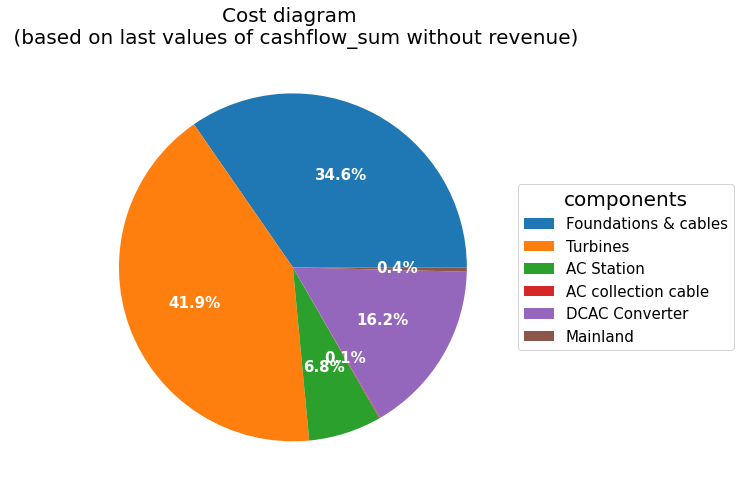

In [36]:
# create pie plot
fig, ax = plt.subplots(figsize=(16, 8), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%"


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, labels,
          title="components",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
         fontsize=15)

plt.setp(autotexts, size=15, weight="bold")

ax.set_title("Cost diagram \n (based on last values of cashflow_sum without revenue)", fontsize=20)

plt.show()

Results Noor:

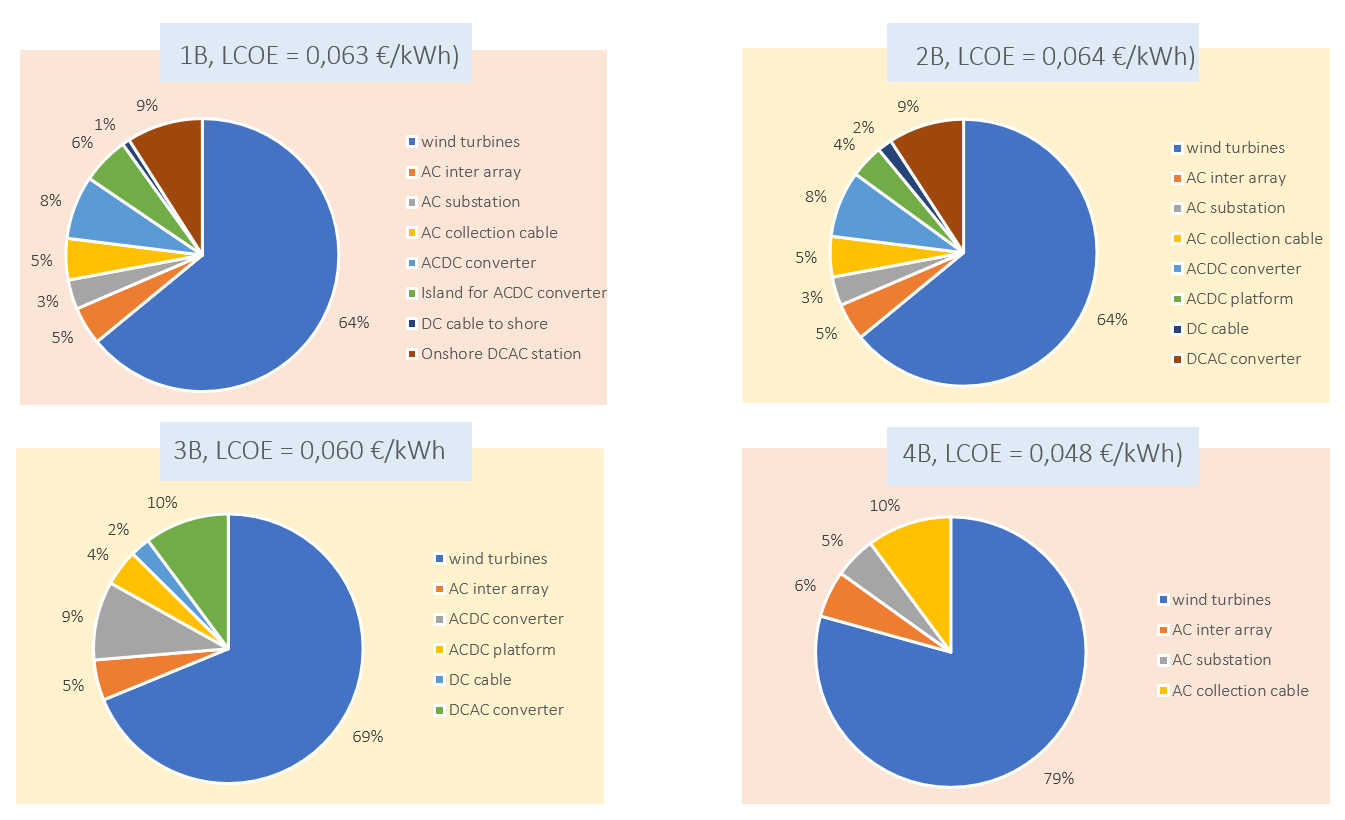

##### 6. Calculate LCOE
NB: This is just an experiment, I am not entirely sure what is the precise way to calculate this (check!!)

Total windpark capacity * operational hours = Wind Energy Production per Year
3000 MW * 4380 h = 13.140.000 MWh 

Operational years * Production per year = Wind Energy Total Production
30 * 13.140.000 = 394.200.000 MWh 

Inter-array cable transport loss = 2%
Wind Energy to AC substation = (100 - 2%) * Wind Energy Total Production = 386.316.000 MWh 

AC collection cable transport loss = 2%

NB: shouldn't we try to estimate cable losses in % loss per km or so?

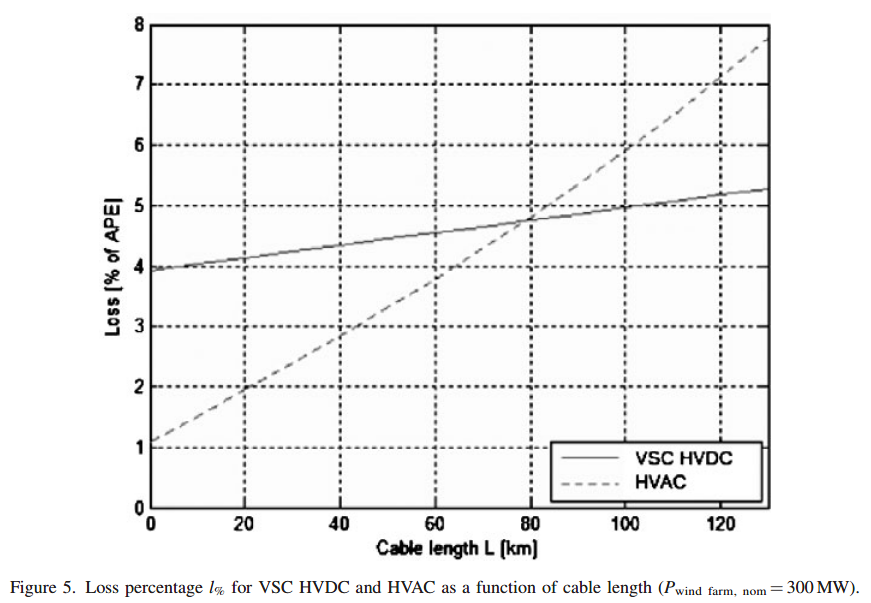

https://www.researchgate.net/publication/228055724_Economic_comparison_of_VSC_HVDC_and_HVAC_as_transmission_system_for_a_300MW_offshore_wind_farm

In [37]:
total_wind_energy_production = 3000 * 1000 * 4380 * 27 # parkcapacity * operational hours * operational lifecycle
print('total_wind_energy_production: {:.0f} kWh'.format(total_wind_energy_production))
energy_after_inter_array_cable_loss = 0.98 * total_wind_energy_production
print('energy_after_inter_array_cable_loss (20 km): {:.0f} kWh'.format(energy_after_inter_array_cable_loss))
energy_after_AC_collection_cable_loss = 0.98 * energy_after_inter_array_cable_loss
print('energy_after_AC_collection_cable_loss (20 km): {:.0f} kWh'.format(energy_after_AC_collection_cable_loss))

total_wind_energy_production: 354780000000 kWh
energy_after_inter_array_cable_loss (20 km): 347684400000 kWh
energy_after_AC_collection_cable_loss (20 km): 340730712000 kWh


In [38]:
total_energy = energy_after_AC_collection_cable_loss # kWh
total_cost = sum(data)            # EU

In [39]:
LCOE = total_cost / total_energy
print('LCOE: {:.2f} EU/kWh'.format(LCOE))

LCOE: 0.06 EU/kWh


In [40]:
# ToDo: also calculate efficiency (part of the originally produced energy that reaches the shore)
SupplyChain_efficiency = energy_after_AC_collection_cable_loss / total_wind_energy_production
print('SupplyChain efficiency: {} %'.format(SupplyChain_efficiency*100))

SupplyChain efficiency: 96.04 %


##### 3. combine cashflows and add revenues

In [41]:
df_combined=combine_cashflow_dataframes([Foundation.df, Turbine.df, ACStation.df, DCCollectionCable.df])

In [42]:
# calculate energy production per year
total_wind_energy_production_per_year = 3000 * 1000 * 4380  # parkcapacity * operational hours 
print('total_wind_energy_production_per_year: {:.0f} kWh'.format(total_wind_energy_production_per_year))

energy_after_inter_array_cable_loss = 0.99 * total_wind_energy_production_per_year
print('energy_after_inter_array_cable_loss (20 km): {:.0f} kWh'.format(energy_after_inter_array_cable_loss))

energy_after_AC_collection_cable_loss = 0.98 * energy_after_inter_array_cable_loss
print('energy_after_AC_collection_cable_loss (20 km): {:.0f} kWh'.format(energy_after_AC_collection_cable_loss))

total_wind_energy_production_per_year: 13140000000 kWh
energy_after_inter_array_cable_loss (20 km): 13008600000 kWh
energy_after_AC_collection_cable_loss (20 km): 12748428000 kWh


In [43]:
# create escalation list
escalation_base_year=2023
lifecycle=30
escalation_rate=0.02
escalation_list = []
escalation_years = []
previous = 1
for index, year in enumerate(list(range(escalation_base_year, escalation_base_year + lifecycle + 1))):
    previous = previous * (1 + escalation_rate)
    escalation_list.append(previous)
    escalation_years.append(year)

In [44]:
# escalate revenue values
construction_duration = 2
revenue_years = list(range(escalation_base_year + construction_duration, escalation_base_year + lifecycle + 1))
revenue_value = energy_after_AC_collection_cable_loss * .15 # LCOE: 0.12 EU/kWh (see below) ... take 3 ct profit?
revenue_values=[]
for i, revenue_year in enumerate(revenue_years):
    revenue_values.append(revenue_value * escalation_list[
        [index for index, escalation_year in enumerate(escalation_years) if escalation_year == revenue_year][0]])

df_combined['revenue'] = revenue_value
for i in [2023, 2024, 2025]:
    df_combined.loc[i, 'revenue'] = 0

In [45]:
df_combined_npv=calculate_npv(df_combined, 2023, WACC=0.0984)

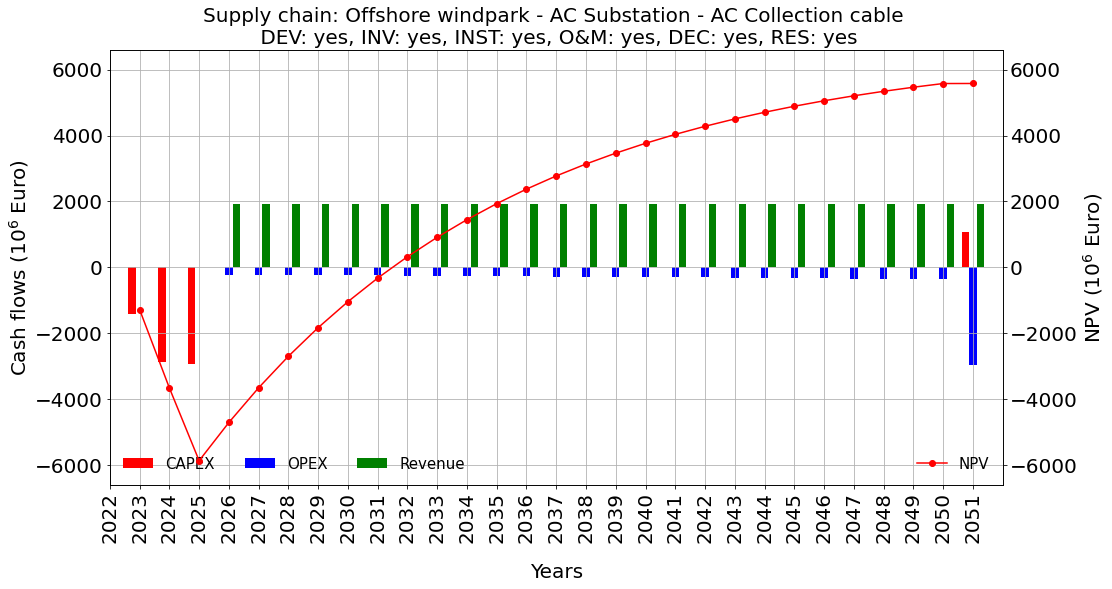

In [46]:
create_npv_plot(df_combined_npv, title='Supply chain: Offshore windpark - AC Substation - AC Collection cable \n DEV: yes, INV: yes, INST: yes, O&M: yes, DEC: yes, RES: yes' )

##### 7. real world visualisation

In [47]:
Turbine.geometry = shapely.geometry.Point([53.00714796349173, 3.885216307202442])
Foundation.geometry = shapely.geometry.Point([53.00714796349173, 3.885216307202442])

In [48]:
m = folium.Map(location=[52.66, 4.43], zoom_start=8)

folium.Marker(
    [Turbine.geometry.x, Turbine.geometry.y], 
    popup="<b>Turbine</b>", 
    tooltip="Click me!"
).add_to(m)

folium.Marker(
    [Foundation.geometry.x, Foundation.geometry.y], 
    popup="<b>Foundation</b>", 
    tooltip="Click me!"
).add_to(m)

cable_coordinates = [
   (53.00714796349173, 3.885216307202442), 
   (52.92142611240917, 4.1185675529709),
   (52.77719815259111, 4.263572751208232), 
   (52.64252638036501, 4.415540586993316), 
   (52.52697551717924, 4.60627767434106), 
]

folium.PolyLine(
    cable_coordinates, 
    tooltip="export cable"
).add_to(m)

m

# 